In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import multiprocessing as mpr
import os

import pivot
# os.environ["MKL_NUM_THREADS"] = "1" 
# os.environ["NUMEXPR_NUM_THREADS"] = "1" 
# os.environ["OMP_NUM_THREADS"] = "1" 

In [2]:
def ForwardSISeqFSDA(iter = 0):
    ns = 20
    nt = 10

    p = 5

    true_beta_s = np.full((p,1), 2) #source's beta
    true_beta_t = np.full((p,1), 0) #target's beta

    k = 3
    pvalue = pivot.pvalue_SI_randcheck(ns, nt, p, true_beta_s, true_beta_t, k)
    return pvalue

In [3]:

list_p_value = []
alpha = 0.05  
rejected = 0
detected = 0

max_iteration = 200
iter = range(max_iteration)

list_p_value = []
for i in iter:
    pvalue = ForwardSISeqFSDA(i)
    list_p_value.append(pvalue)
for i in list_p_value:
    if i <= alpha:
        rejected += 1
    else:
        detected += 1
FPR = rejected / (rejected + detected)


Forward SI-SeqFS-DA

False positive rate: 0.065
KS-Test result: 0.806125451157426


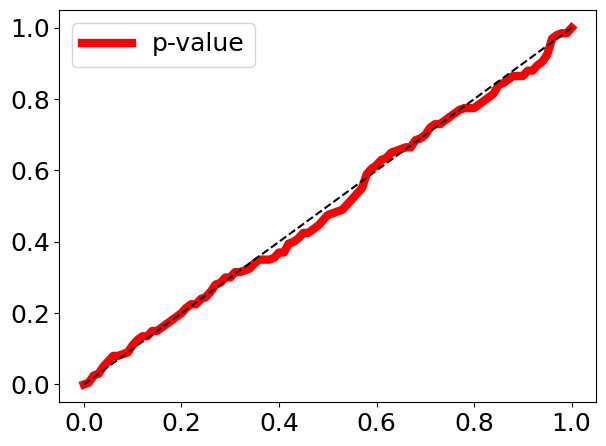

In [4]:
kstest = scipy.stats.kstest(list_p_value, 'uniform')
print(f"False positive rate: {FPR}")
print(f'KS-Test result: {kstest.pvalue}')

plt.rcParams.update({'font.size': 18})
grid = np.linspace(0, 1, 101)
plt.plot(grid, sm.distributions.ECDF(np.array(list_p_value))(grid), 'r-', linewidth=6, label='p-value')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()
plt.show()